# Lab 5 - K-means Clustering

### Excercise - 1

##### Using the Python “sklearn” library, create and visualize the k-means clusters (with k=5) for the given heart disease dataset. For visualization, draw the scatter plot using the age and cholesterol features on each group of clusters. (2 marks)

<AxesSubplot:xlabel='age', ylabel='chol'>

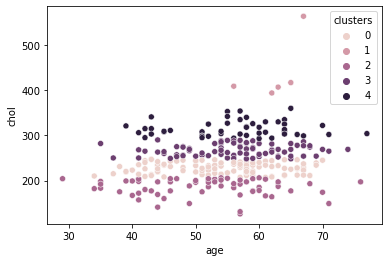

In [9]:
import pandas as pd
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import seaborn as sns
import kneed as kne
import scipy.cluster.hierarchy as sch

heartdisease = pd.read_csv('heart-disease-dataset.csv')
kmeans = cluster.KMeans(n_clusters=5, init='k-means++')
kmeans = kmeans.fit(heartdisease[['age', 'chol']])
heartdisease['clusters'] = kmeans.labels_
sns.scatterplot(x='age', y='chol', hue='clusters', data=heartdisease)

### Excercise - 2

##### Apply k-means clusters on the heart disease dataset with varying numbers of clusters from 1 to 10 and compute their corresponding Sum of squared Error (SSE) value. Plot the graph using Python “matplotlib” library and estimate the right “k” value.

C:\Users\polat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


<AxesSubplot:xlabel='clusters', ylabel='wss'>

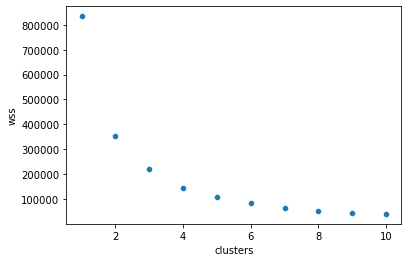

In [10]:
K = range(1,11)
wss = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k, init='k-means++')
    kmeans = kmeans.fit(heartdisease[['age', 'chol']])
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

mycenters = pd.DataFrame({'clusters': K, 'wss': wss})
sns.scatterplot(x='clusters', y = 'wss', data=mycenters, markers="+")

###### Estimating from the scatter plot above a k-means value of 3 looks to be sufficient

Using the Kneed Library we can calculate the knee point of a function which lines up with our estimate at 3


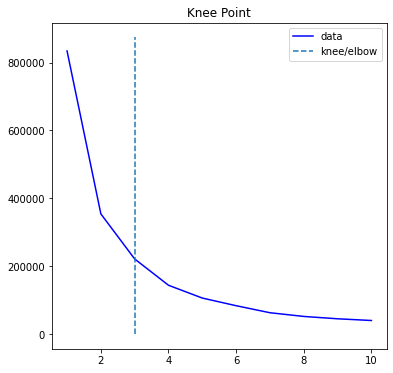

In [ ]:
kneedle = kne.KneeLocator(K, wss, S=1.0, curve="convex", direction="decreasing")
kneedle.plot_knee()
print("Using the Kneed Library we can calculate the knee point of a function which lines up with our estimate at {}".format(round(kneedle.knee, 3)))


### Excercise - 3

##### Create and visualize the k-means clustering with the “k” value obtained in Q2. The clustering algorithm ultimately groups similar patients by matching its features. Thus, for the visualization, draw the scatter plot using the age and cholesterol features on each cluster group and label them as “Group-A”, “Group-B” etc.,   (2 marks)

<AxesSubplot:xlabel='age', ylabel='chol'>

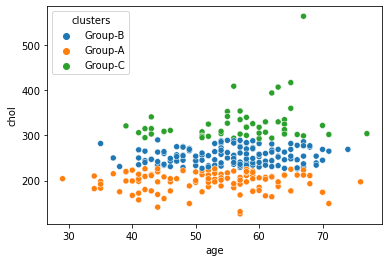

In [17]:
heartdisease = pd.read_csv('heart-disease-dataset.csv')
kmeans = cluster.KMeans(n_clusters=3, init='k-means++')
kmeans = kmeans.fit(heartdisease[['age', 'chol']])
heartdisease['clusters'] = kmeans.labels_
heartdisease['clusters'].replace({0: "Group-A", 1: "Group-B", 2: "Group-C"}, inplace=True)
sns.scatterplot(x='age', y='chol', hue='clusters', data=heartdisease)

### Excercise - 4

##### Plot a dendrogram using Python scipy.cluster.hierarchy method. (1 marks)

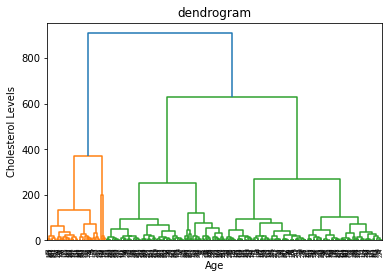

In [11]:
dendro = sch.dendrogram(sch.linkage(heartdisease[['age', 'chol']],method = 'ward'))
plt.title('dendrogram')
plt.xlabel('Age')
plt.ylabel('Cholesterol Levels')
plt.show()

<b>Exercise - 5</b>

Create the agglomerative clustering with the number of clusters is equal to the “k” value 
obtained in Question-2. Visualize the clusters similar to Question-2

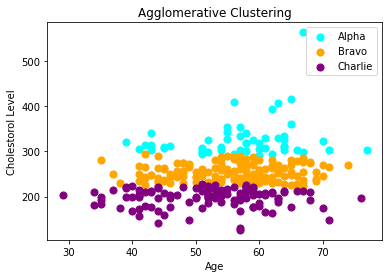

In [22]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


heartdisease = pd.read_csv('heart-disease-dataset.csv')
hdv = heartdisease[['age','chol']].values

hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(hdv)

plt.scatter(hdv[y_hc==0,0], hdv[y_hc==0,1], s=50, c='cyan', label='Alpha')
plt.scatter(hdv[y_hc==1,0], hdv[y_hc==1,1], s=50, c='orange', label='Bravo')
plt.scatter(hdv[y_hc==2,0], hdv[y_hc==2,1], s=50, c='purple', label='Charlie')
plt.title('Agglomerative Clustering')
plt.xlabel('Age')
plt.ylabel('Cholestorol Level')
plt.legend()
plt.show()



<b> Exercise - 6</b>

Compute silhouette score for both K-means and agglomerative clustering and tell us which clustering is better for the given dataset

In [44]:
# Silhouette score measures how accurate a cluster is when observed through
#estimating the mean difference between clusters.
from sklearn.metrics import silhouette_samples, silhouette_score
silscoreA = silhouette_score(hdv, y_hc)
print('The Silhouette Score for Agglomerative clustering is: ', silscoreA)

silscoreK = silhouette_score(heartdisease[['age', 'chol']], kmeans.labels_, metric='euclidean')
print('The Silhouette Score for K-Means Clustering is: ', silscoreK)
print('---------------')
print('As it seems, the Silhouette score for K-means clustering is higher, which means K-means clustering is better for this particular dataset.')

The Silhouette Score for Agglomerative clustering is:  0.46667548711611545
The Silhouette Score for K-Means Clustering is:  0.46850176100308877
---------------
As it seems, the Silhouette score for K-means clustering is higher, which means K-means clustering is better for this particular dataset.
